In [734]:
from utilities import *
import utilities as ut
import pandas as pd
import seaborn as sns
import os
import requests

In [501]:
from jupyterthemes import jtplot
jtplot.reset()

In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [780]:
d = json.load(open("map_category.json", "r"))
map_cat = {}
for k, v in d.items():
    for j in v:
        map_cat[j] = k

def mtype(mapname):
    if mapname.startswith('room'):
        return 'room'
    elif mapname.startswith('maze'):
        return 'maze'
    elif mapname.startswith('random'):
        return 'random'
    else:
        return map_cat.get(mapname +".map", "game")

def add_columns(df):
    df.insert(2, "step-cost", df['tcost'] / df['steps'])
    df.insert(2, "step-access", df["access"] / df['steps'])
    df.insert(2, "diff", df["distance"] - df["expect"])
    df.insert(2, "step-diff", df["diff"] / df["steps"])
    df.insert(2, "subopt", df["diff"] / df["expect"])
    df.insert(2, "mtype", df["map"].apply(lambda x: mtype(x)))

In [789]:
cpd['mtype'].value_counts()

da2       954100
dao       621796
sc1       416590
maze      130620
random     30100
room       25340
Name: mtype, dtype: int64

# Load data

In [785]:
# load cpd
prefix = '../outputs/cpd/'
h = [prefix + i for i in os.listdir(prefix)]

cpd = load_files(h)
add_columns(cpd)
cpd.head()

../outputs/cpd/lt_darktown.map-3-dfs-c4-inv.txt
../outputs/cpd/ht_chantry.map-3-dfs-c32-inv.txt
../outputs/cpd/orz107d.map-3-dfs-c2-inv.txt
../outputs/cpd/orz301d.map-3-dfs-c8.txt
../outputs/cpd/orz102d.map-3-dfs-c32-inv.txt
../outputs/cpd/orz103d.map-3-dfs-c64-inv.txt
../outputs/cpd/ca_cave.map-3-dfs-c32-inv.txt
../outputs/cpd/orz700d.map-3-dfs-opt-inv.txt
../outputs/cpd/ht_bartrand_n.map-3-dfs-c16.txt
../outputs/cpd/dr_slavers.map-3-dfs-c2-inv.txt
../outputs/cpd/ht_bartrand_n.map-3-dfs-opt.txt
../outputs/cpd/lt_0_lowtown_a2.map-3-dfs-opt-inv.txt
../outputs/cpd/BrokenSteppes.map-3-dfs-c2-inv.txt
../outputs/cpd/Archipelago.map-3-dfs-c8-inv.txt
../outputs/cpd/lt_backalley_g.map-3-dfs-c2-inv.txt
../outputs/cpd/lt_ruinedhouse_n.map-3-dfs-c2-inv.txt
../outputs/cpd/dr_0_deeproads.map-3-dfs-c2-inv.txt
../outputs/cpd/ca_caverns2prc.map-3-dfs-c32-inv.txt
../outputs/cpd/orz103d.map-3-dfs-c16-inv.txt
../outputs/cpd/orz500d.map-3-dfs-c64.txt
../outputs/cpd/w_encounter1.map-3-dfs-c8-inv.txt
../out

../outputs/cpd/Aftershock.map-3-dfs-opt-inv.txt
../outputs/cpd/lt_gallowstemplar_f.map-3-dfs-c16-inv.txt
../outputs/cpd/ht_keep.map-3-dfs-c64-inv.txt
../outputs/cpd/BlackLotus.map-3-dfs-c2-inv.txt
../outputs/cpd/lt_gallowscourtyard.map-3-dfs-opt-inv.txt
../outputs/cpd/Backwoods.map-3-dfs-c16.txt
../outputs/cpd/lt_0_lowtown_a2_n.map-3-dfs-c32-inv.txt
../outputs/cpd/orz301d.map-3-dfs-c64.txt
../outputs/cpd/Backwoods.map-3-dfs-opt.txt
../outputs/cpd/ht_playershouse_n.map-3-dfs-c2-inv.txt
../outputs/cpd/ht_0_hightown_a2.map-3-dfs-c16-inv.txt
../outputs/cpd/lt_hangedman_n.map-3-dfs-c8-inv.txt
../outputs/cpd/lt_gallowscourtyard_n.map-3-dfs-c16-inv.txt
../outputs/cpd/lt_warehouse_n.map-3-dfs-c2.txt
../outputs/cpd/orz200d.map-3-dfs-c32.txt
../outputs/cpd/ca_caverns1_mines.map-3-dfs-c8.txt
../outputs/cpd/orz702d.map-3-dfs-c2-inv.txt
../outputs/cpd/ht_keep_n.map-3-dfs-c2-inv.txt
../outputs/cpd/ht_keep.map-3-dfs-c64.txt
../outputs/cpd/orz900d.map-3-dfs-c16-inv.txt
../outputs/cpd/lt_0_lowtown_dock

../outputs/cpd/lt_0_lowtown_a2_n.map-3-dfs-opt.txt
../outputs/cpd/orz201d.map-3-dfs-opt.txt
../outputs/cpd/lt_0_lowtown_docks.map-3-dfs-c8.txt
../outputs/cpd/ht_0_hightown_a3.map-3-dfs-c2.txt
../outputs/cpd/ht_playershouse_n.map-3-dfs-c4.txt
../outputs/cpd/lt_undercityserialkiller.map-3-dfs-c8.txt
../outputs/cpd/orz500d.map-3-dfs-c16-inv.txt
../outputs/cpd/w_blightlands.map-3-dfs-c64.txt
../outputs/cpd/lt_backalley_g.map-3-dfs-opt-inv.txt
../outputs/cpd/lt_undercitydungeon.map-3-dfs-c32-inv.txt
../outputs/cpd/orz106d.map-3-dfs-c4-inv.txt
../outputs/cpd/dr_dungeon.map-3-dfs-c8-inv.txt
../outputs/cpd/w_encounter1.map-3-dfs-c32.txt
../outputs/cpd/dr_dungeon.map-3-dfs-c32-inv.txt
../outputs/cpd/Brushfire.map-3-dfs-c4.txt
../outputs/cpd/orz000d.map-3-dfs-c8.txt
../outputs/cpd/Brushfire.map-3-dfs-c8-inv.txt
../outputs/cpd/random-100-33.map-3-dfs-c32.txt
../outputs/cpd/ht_brothel_n.map-3-dfs-opt.txt
../outputs/cpd/orz500d.map-3-dfs-c64-inv.txt
../outputs/cpd/ht_brothel_n.map-3-dfs-c16.txt
../

../outputs/cpd/w_encounter3.map-3-dfs-c4.txt
../outputs/cpd/orz100d.map-3-dfs-c64.txt
../outputs/cpd/orz106d.map-3-dfs-c64-inv.txt
../outputs/cpd/ht_brothel_n.map-3-dfs-c4.txt
../outputs/cpd/orz107d.map-3-dfs-c32-inv.txt
../outputs/cpd/lt_0_lowtown_docks.map-3-dfs-c16-inv.txt
../outputs/cpd/orz901d.map-3-dfs-c64-inv.txt
../outputs/cpd/orz900d.map-3-dfs-c32-inv.txt
../outputs/cpd/lt_0_lowtown_a2.map-3-dfs-c2-inv.txt
../outputs/cpd/orz000d.map-3-dfs-c64-inv.txt
../outputs/cpd/orz704d.map-3-dfs-c2-inv.txt
../outputs/cpd/w_encounter2.map-3-dfs-c32.txt
../outputs/cpd/lt_backalley_n.map-3-dfs-c64-inv.txt
../outputs/cpd/dr_primevaltomb.map-3-dfs-c32-inv.txt
../outputs/cpd/ht_brothel_n.map-3-dfs-c32-inv.txt
../outputs/cpd/ht_playershouse_n.map-3-dfs-opt-inv.txt
../outputs/cpd/ArcticStation.map-3-dfs-opt-inv.txt
../outputs/cpd/room-400-40.map-3-dfs-c64.txt
../outputs/cpd/ht_store.map-3-dfs-c2.txt
../outputs/cpd/lt_gallowscourtyard_n.map-3-dfs-c2-inv.txt
../outputs/cpd/lt_0_lowtown_docks_n.map-3

../outputs/cpd/ht_chantry.map-3-dfs-c8-inv.txt
../outputs/cpd/lt_hangedman_n.map-3-dfs-c2.txt
../outputs/cpd/orz500d.map-3-dfs-c16.txt
../outputs/cpd/lt_0_lowtown_a2_n.map-3-dfs-c2-inv.txt
../outputs/cpd/orz500d.map-3-dfs-opt.txt
../outputs/cpd/room-100-10.map-3-dfs-c4.txt
../outputs/cpd/lt_warehouse_n.map-3-dfs-c4-inv.txt
../outputs/cpd/lt_0_lowtown_docks_a3_n.map-3-dfs-c8-inv.txt
../outputs/cpd/orz301d.map-3-dfs-opt-inv.txt
../outputs/cpd/random-400-33.map-3-dfs-c2-inv.txt
../outputs/cpd/orz102d.map-3-dfs-c8.txt
../outputs/cpd/lt_0_lowtown_a2_n.map-3-dfs-c8.txt
../outputs/cpd/lt_0_lowtown_docks_a3.map-3-dfs-c16-inv.txt
../outputs/cpd/orz300d.map-3-dfs-c32.txt
../outputs/cpd/ht_0_hightown_a2.map-3-dfs-c2.txt
../outputs/cpd/random-400-33.map-3-dfs-c8.txt
../outputs/cpd/room-400-40.map-3-dfs-c32-inv.txt
../outputs/cpd/ca_cavern1_haunted.map-3-dfs-c2-inv.txt
../outputs/cpd/ht_mansion_n.map-3-dfs-c4.txt
../outputs/cpd/AcrosstheCape.map-3-dfs-opt-inv.txt
../outputs/cpd/ca_caverns2prc.map-3

../outputs/cpd/lt_0_lowtown_docks_a3.map-3-dfs-opt-inv.txt
../outputs/cpd/lt_warehouse.map-3-dfs-c8.txt
../outputs/cpd/lt_0_lowtown_n.map-3-dfs-c32.txt
../outputs/cpd/lt_0_lowtown_a2.map-3-dfs-c16.txt
../outputs/cpd/lt_0_lowtown_a3_n_c.map-3-dfs-c8.txt
../outputs/cpd/lt_0_lowtown_a2.map-3-dfs-opt.txt
../outputs/cpd/orz999d.map-3-dfs-c32.txt
../outputs/cpd/orz106d.map-3-dfs-c2.txt
../outputs/cpd/orz107d.map-3-dfs-c4.txt
../outputs/cpd/orz601d.map-3-dfs-c32.txt
../outputs/cpd/orz301d.map-3-dfs-c64-inv.txt
../outputs/cpd/orz300d.map-3-dfs-c32-inv.txt
../outputs/cpd/Backwoods.map-3-dfs-c4.txt
../outputs/cpd/orz106d.map-3-dfs-c2-inv.txt
../outputs/cpd/orz105d.map-3-dfs-c32.txt
../outputs/cpd/random-400-33.map-3-dfs-c16.txt
../outputs/cpd/lt_undercityencounter.map-3-dfs-c16-inv.txt
../outputs/cpd/ca_caverns1_mines.map-3-dfs-c64.txt
../outputs/cpd/random-400-33.map-3-dfs-opt.txt
../outputs/cpd/lt_undercityserialkiller.map-3-dfs-c32-inv.txt
../outputs/cpd/dr_dungeon.map-3-dfs-c32.txt
../output

../outputs/cpd/ht_0_hightown.map-3-dfs-c64-inv.txt
../outputs/cpd/ca_cavern1_haunted.map-3-dfs-opt.txt
../outputs/cpd/lt_0_lowtown_docks.map-3-dfs-c32.txt
../outputs/cpd/orz303d.map-3-dfs-c4.txt
../outputs/cpd/orz203d.map-3-dfs-c64-inv.txt
../outputs/cpd/orz302d.map-3-dfs-c2.txt
../outputs/cpd/random-100-33.map-3-dfs-c8.txt
../outputs/cpd/BlackLotus.map-3-dfs-c4-inv.txt
../outputs/cpd/lt_gamlenshouse_n.map-3-dfs-opt.txt
../outputs/cpd/ht_playershouse_n.map-3-dfs-c4-inv.txt
../outputs/cpd/orz101d.map-3-dfs-c64.txt
../outputs/cpd/lt_gamlenshouse_n.map-3-dfs-c16.txt
../outputs/cpd/ht_0_hightown_a3.map-3-dfs-opt.txt
../outputs/cpd/BrokenSteppes.map-3-dfs-c2.txt
../outputs/cpd/lt_foundry_n.map-3-dfs-c8.txt
../outputs/cpd/ht_0_hightown_a3.map-3-dfs-c16.txt
../outputs/cpd/lt_0_lowtown_docks_a3.map-3-dfs-c8.txt
../outputs/cpd/lt_0_lowtown_docks_a3.map-3-dfs-c16.txt
../outputs/cpd/BrokenSteppes.map-3-dfs-c16-inv.txt
../outputs/cpd/lt_0_lowtown_docks_a3.map-3-dfs-opt.txt
../outputs/cpd/orz304d.m

../outputs/cpd/ca_cave.map-3-dfs-c32.txt
../outputs/cpd/orz304d.map-3-dfs-c16-inv.txt
../outputs/cpd/lt_0_lowtown_a2_n_c.map-3-dfs-c4-inv.txt
../outputs/cpd/lt_undercityserialkiller.map-3-dfs-c4.txt
../outputs/cpd/ht_playershouse_n.map-3-dfs-c8.txt
../outputs/cpd/w_encounter2_camp.map-3-dfs-c8-inv.txt
../outputs/cpd/orz500d.map-3-dfs-c2.txt
../outputs/cpd/ht_brothel_n.map-3-dfs-c4-inv.txt
../outputs/cpd/lt_gallowstemplar_n.map-3-dfs-c2-inv.txt
../outputs/cpd/w_encounter1.map-3-dfs-opt.txt
../outputs/cpd/w_encounter1.map-3-dfs-c16.txt
../outputs/cpd/lt_warehouse.map-3-dfs-c4-inv.txt
../outputs/cpd/random-400-33.map-3-dfs-opt-inv.txt
../outputs/cpd/w_sundermount.map-3-dfs-c2.txt
../outputs/cpd/dr_primevaltomb.map-3-dfs-c64.txt
../outputs/cpd/Brushfire.map-3-dfs-c8.txt
../outputs/cpd/orz000d.map-3-dfs-c4.txt
../outputs/cpd/dr_slavers.map-3-dfs-c2.txt
../outputs/cpd/w_bonepitdestroyed_a3.map-3-dfs-opt-inv.txt
../outputs/cpd/w_encounter2_camp.map-3-dfs-c32.txt
../outputs/cpd/orz203d.map-3-d

../outputs/cpd/lt_hangedman.map-3-dfs-c4.txt
../outputs/cpd/orz301d.map-3-dfs-c32-inv.txt
../outputs/cpd/orz300d.map-3-dfs-c64-inv.txt
../outputs/cpd/lt_0_lowtown_a2_n_c.map-3-dfs-c16-inv.txt
../outputs/cpd/room-400-40.map-3-dfs-opt-inv.txt
../outputs/cpd/ht_0_hightown_a3.map-3-dfs-c8.txt
../outputs/cpd/Archipelago.map-3-dfs-c4-inv.txt
../outputs/cpd/lt_0_lowtown_docks.map-3-dfs-c2.txt
../outputs/cpd/ht_mansion2b.map-3-dfs-c4-inv.txt
../outputs/cpd/orz203d.map-3-dfs-opt.txt
../outputs/cpd/lt_backalley_n.map-3-dfs-c2-inv.txt
../outputs/cpd/orz203d.map-3-dfs-c16.txt
../outputs/cpd/orz500d.map-3-dfs-c4.txt
../outputs/cpd/lt_undercityserialkiller.map-3-dfs-c2.txt
../outputs/cpd/w_encounter3.map-3-dfs-c2-inv.txt
../outputs/cpd/Aurora.map-3-dfs-c2-inv.txt
../outputs/cpd/w_encounter1.map-3-dfs-c4-inv.txt
../outputs/cpd/lt_hangedman.map-3-dfs-c4-inv.txt
../outputs/cpd/lt_undercityserialkiller.map-3-dfs-c64-inv.txt
../outputs/cpd/lt_hangedman.map-3-dfs-c16.txt
../outputs/cpd/dr_slavers.map-3-df

,map,scenid,mtype,subopt,step-diff,diff,step-access,step-cost,tcost,distance,expect,steps,access,r,itype
0,lt_darktown,0,da2,0.0,0.0,0.0,0.250000,148.650,594.6,4.00000,4.00000,4,1,4,backward
1,lt_darktown,1,da2,0.0,0.0,0.0,0.125000,86.425,691.4,7.82843,7.82843,8,1,4,backward
2,lt_darktown,2,da2,0.0,0.0,0.0,0.250000,158.300,633.2,6.65685,6.65685,4,1,4,backward
3,lt_darktown,3,da2,0.0,0.0,0.0,0.000000,233.600,467.2,4.41421,4.41421,2,0,4,backward
4,lt_darktown,4,da2,0.0,0.0,0.0,0.333333,133.400,400.2,4.00000,4.00000,3,1,4,backward


In [594]:
# load tree
prefix = "../outputs/tree/"
h = [prefix + i for i in os.listdir(prefix)]
tree = load_files(h)
tree.insert(2, "step-cost", tree['tcost'] / tree['steps'])
tree.insert(2, "diff", tree["distance"] - tree["expect"])
tree.insert(2, "step-diff", tree["diff"] / tree["steps"])
tree.insert(2, "subopt", tree["diff"] / tree["expect"])
tree['d'] = 0
tree.head()

../outputs/tree/maze-400-4.map.txt
../outputs/tree/w_encounter2.map.txt
../outputs/tree/orz601d.map.txt
../outputs/tree/BrokenSteppes.map.txt
../outputs/tree/ht_chantry_n.map.txt
../outputs/tree/ca_caverns1.map.txt
../outputs/tree/orz703d.map.txt
../outputs/tree/orz702d.map.txt
../outputs/tree/w_encounter2_camp.map.txt
../outputs/tree/Backwoods.map.txt
../outputs/tree/w_blightlands.map.txt
../outputs/tree/lt_gallowscourtyard.map.txt
../outputs/tree/orz107d.map.txt
../outputs/tree/orz106d.map.txt
../outputs/tree/lt_darktown.map.txt
../outputs/tree/lt_warehouse_n.map.txt
../outputs/tree/BigGameHunters.map.txt
../outputs/tree/dr_primevaltomb.map.txt
../outputs/tree/orz203d.map.txt
../outputs/tree/w_sundermount.map.txt
../outputs/tree/lt_undercityserialkiller.map.txt
../outputs/tree/w_encounter3.map.txt
../outputs/tree/lt_shop.map.txt
../outputs/tree/orz301d.map.txt
../outputs/tree/orz300d.map.txt
../outputs/tree/lt_gallowstemplar.map.txt
../outputs/tree/ht_chantry.map.txt
../outputs/tree/

,map,scenid,subopt,step-diff,diff,step-cost,tcost,distance,expect,steps,d,itype
0,maze-400-4,0,82.686141,1.070364,364.99399,6.328446,2158.0,369.4082,4.41421,341,0,tree
1,maze-400-4,1,1.093826,0.569030,6.82836,13.166667,158.0,13.0710,6.24264,12,0,tree
2,maze-400-4,2,0.707098,0.438943,4.82837,14.036364,154.4,11.6568,6.82843,11,0,tree
3,maze-400-4,3,322.240533,1.114376,1933.44320,5.669625,9836.8,1939.4432,6.00000,1735,0,tree
4,maze-400-4,4,258.227795,1.108682,1612.02316,5.192297,7549.6,1618.2658,6.24264,1454,0,tree


In [596]:
# load focal
prefix = "../outputs/focal/"
h = [prefix + i for i in os.listdir(prefix)]
focal = load_files(h)
focal.insert(2, "step-cost", focal['tcost'] / focal['steps'])
focal.insert(2, "diff", focal["distance"] - focal["expect"])
focal.insert(2, "step-diff", focal["diff"] / focal["steps"])
focal.insert(2, "subopt", focal["diff"] / focal["expect"])
focal.insert(2, 'itype', 'focal')
focal.head()

../outputs/focal/maze-400-4-8.txt
../outputs/focal/lt_gallowscourtyard-32.txt
../outputs/focal/dr_slavers-0.txt
../outputs/focal/lt_0_lowtown_docks_a3_n-32.txt
../outputs/focal/random-400-33-128.txt
../outputs/focal/lt_0_lowtown_a3_n_c-8.txt
../outputs/focal/orz105d-32.txt
../outputs/focal/ht_0_hightown-4.txt
../outputs/focal/dr_primevalentrance-0.txt
../outputs/focal/ca_caverns1_mines-64.txt
../outputs/focal/ht_brothel_n-32.txt
../outputs/focal/lt_foundry_n-32.txt
../outputs/focal/lt_warehouse-8.txt
../outputs/focal/orz703d-64.txt
../outputs/focal/Brushfire-8.txt
../outputs/focal/lt_0_lowtown_a2_n-16.txt
../outputs/focal/ht_bartrand_n-16.txt
../outputs/focal/lt_gallowstemplar_f-64.txt
../outputs/focal/w_encounter2-64.txt
../outputs/focal/room-100-10-32.txt
../outputs/focal/ht_brothel_n-4.txt
../outputs/focal/lt_0_lowtown_docks-32.txt
../outputs/focal/orz101d-8.txt
../outputs/focal/orz105d-128.txt
../outputs/focal/orz201d-32.txt
../outputs/focal/orz702d-0.txt
../outputs/focal/ht_store-

../outputs/focal/orz304d-128.txt
../outputs/focal/lt_ruinedhouse_n-0.txt
../outputs/focal/orz500d-8.txt
../outputs/focal/Brushfire-64.txt
../outputs/focal/lt_warehouse-128.txt
../outputs/focal/orz303d-0.txt
../outputs/focal/lt_undercityencounter-32.txt
../outputs/focal/orz203d-0.txt
../outputs/focal/lt_0_lowtown_n-8.txt
../outputs/focal/lt_0_lowtown_docks-8.txt
../outputs/focal/w_bonepitmining_a2-4.txt
../outputs/focal/random-100-33-16.txt
../outputs/focal/ht_mansion2-0.txt
../outputs/focal/ht_mansion2-16.txt
../outputs/focal/lt_0_lowtown_docks_n-8.txt
../outputs/focal/dr_0_deeproads-16.txt
../outputs/focal/BlackLotus-0.txt
../outputs/focal/orz901d-4.txt
../outputs/focal/orz700d-64.txt
../outputs/focal/w_encounter2_camp-4.txt
../outputs/focal/lt_0_lowtown_docks_a3-16.txt
../outputs/focal/orz800d-128.txt
../outputs/focal/orz100d-0.txt
../outputs/focal/orz000d-0.txt
../outputs/focal/orz703d-8.txt
../outputs/focal/ca_cavern1_haunted-32.txt
../outputs/focal/lt_0_lowtown_docks_n-32.txt
../o

../outputs/focal/orz704d-64.txt
../outputs/focal/orz105d-4.txt
../outputs/focal/ht_chantry-128.txt
../outputs/focal/lt_gallowstemplar-128.txt
../outputs/focal/lt_gallowstemplar-32.txt
../outputs/focal/ht_playershouse_n-16.txt
../outputs/focal/orz100d-8.txt
../outputs/focal/orz300d-128.txt
../outputs/focal/orz000d-8.txt
../outputs/focal/orz301d-128.txt
../outputs/focal/BlastFurnace-64.txt
../outputs/focal/orz703d-0.txt
../outputs/focal/orz102d-32.txt
../outputs/focal/lt_shop-128.txt
../outputs/focal/ca_caverns1_mines-4.txt
../outputs/focal/w_encounter3-64.txt
../outputs/focal/BlackLotus-8.txt
../outputs/focal/lt_0_lowtown_docks_n-0.txt
../outputs/focal/w_encounter3-128.txt
../outputs/focal/lt_0_lowtown_docks-0.txt
../outputs/focal/lt_undercityserialkiller-128.txt
../outputs/focal/lt_hangedman_n-16.txt
../outputs/focal/ht_mansion2-8.txt
../outputs/focal/w_bonepitmining_a2-8.txt
../outputs/focal/lt_0_lowtown_docks-4.txt
../outputs/focal/random-100-33-32.txt
../outputs/focal/lt_0_lowtown_d

../outputs/focal/ca_caverns1-4.txt
../outputs/focal/ht_0_hightown_a3-16.txt
../outputs/focal/orz107d-64.txt
../outputs/focal/random-100-33-128.txt
../outputs/focal/w_encounter1-0.txt
../outputs/focal/orz302d-16.txt
../outputs/focal/Aftershock-128.txt
../outputs/focal/w_bonepit-0.txt
../outputs/focal/lt_backalley_n-8.txt
../outputs/focal/lt_undercitydungeon-8.txt
../outputs/focal/lt_0_lowtown_docks_a3_n-128.txt
../outputs/focal/lt_house-4.txt
../outputs/focal/ht_mansion_n-64.txt
../outputs/focal/ArcticStation-128.txt
../outputs/focal/ht_0_hightown_n-32.txt
../outputs/focal/orz704d-16.txt
../outputs/focal/ca_caverns2-32.txt
../outputs/focal/ht_0_hightown_n-8.txt
../outputs/focal/w_blightlands-0.txt
../outputs/focal/maze-400-4-16.txt
../outputs/focal/ca_caverns2-128.txt
../outputs/focal/ht_playershouse_n-64.txt
../outputs/focal/lt_shop-32.txt
../outputs/focal/orz302d-4.txt
../outputs/focal/room-400-40-128.txt
../outputs/focal/random-100-33-8.txt
../outputs/focal/room-100-10-4.txt
../outpu

,map,scenid,itype,subopt,step-diff,diff,step-cost,tcost,distance,expect,steps,r
0,maze-400-4,0,focal,0.0,0.0,0.0,455.240000,2276.2,4.41421,4.41421,5,8
1,maze-400-4,1,focal,0.0,0.0,0.0,429.366667,2576.2,6.24264,6.24264,6,8
2,maze-400-4,2,focal,0.0,0.0,0.0,327.457143,2292.2,6.82843,6.82843,7,8
3,maze-400-4,3,focal,0.0,0.0,0.0,278.485714,1949.4,6.00000,6.00000,7,8
4,maze-400-4,4,focal,0.0,0.0,0.0,383.800000,2302.8,6.24264,6.24264,6,8


In [1019]:
game = cpd[cpd['map'].apply(lambda x: mtype(x) not in ['room', 'maze', 'random'])]
fgame = focal[focal['map'].apply(lambda x: mtype(x) not in ['room', 'maze', 'random'])]
tgame = tree[tree['map'].apply(lambda x: mtype(x) not in ['room', 'maze', 'random'])]

In [598]:
def group_cpd(cpd_df, group=["itype", "r"], index=['map', 'scenid'], col='tcost'):
    gr_cpd = cpd_df.groupby(group)
    columns = group + index + [col]
    print (columns)
    tmps = []
    keys = sorted(gr_cpd.groups.keys())
    for k in keys:
        d = gr_cpd.get_group(k)[columns]
        tmps.append(d.rename(columns={col: "%s-%s" % (col, '-'.join([str(i) for i in k]))}).drop(columns=group).set_index(index))
    from functools import reduce
    return reduce(lambda df1, df2: df1.join(df2, on=index), tmps)

# Experiment: Path Extraction

## compare diff

In [1178]:
t = group_cpd(game[game['r']>0], col='diff')
t2 = group_cpd(fgame[fgame['r']>0], col='diff')

['itype', 'r', 'map', 'scenid', 'diff']
['itype', 'r', 'map', 'scenid', 'diff']


In [696]:
t.shape

(155824, 12)

In [1179]:
merged = t.merge(t2, on=['map','scenid'], how='inner').merge(tgame[['diff', 'map', 'scenid']], on=['map', 'scenid'], how='inner')
merged.head()

,map,scenid,diff-backward-2,diff-backward-4,diff-backward-8,diff-backward-16,diff-backward-32,diff-backward-64,diff-forward-2,diff-forward-4,...,diff-forward-16,diff-forward-32,diff-forward-64,diff-focal-4,diff-focal-8,diff-focal-16,diff-focal-32,diff-focal-64,diff-focal-128,diff
0,orz107d,0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.00000,2.82843,...,0.58579,0.58579,0.58579,0.0,0.0,0.0,0.0,0.0,0.0,1.99999
1,orz107d,1,0.00000,0.00000,0.0,0.0,0.0,0.0,0.58578,1.00000,...,0.58578,0.58578,0.58578,0.0,0.0,0.0,0.0,0.0,0.0,1.99997
2,orz107d,2,0.00000,0.58578,0.0,0.0,0.0,0.0,0.00000,4.00000,...,1.41421,1.41421,1.41421,0.0,0.0,0.0,0.0,0.0,0.0,5.41417
3,orz107d,3,0.00000,0.00000,0.0,0.0,0.0,0.0,0.58578,3.00000,...,1.41421,1.41421,1.41421,0.0,0.0,0.0,0.0,0.0,0.0,5.99997
4,orz107d,4,0.82843,0.00000,0.0,0.0,0.0,0.0,2.00000,4.00000,...,2.00000,2.00000,2.00000,0.0,0.0,0.0,0.0,0.0,0.0,11.65679


In [1180]:
desc = merged[['diff-backward-16', 'diff-focal-32',
               'diff-backward-32', 'diff-focal-64', 
               'diff-backward-64', 'diff-focal-128', 'diff']].describe(percentiles=[0.5, 0.75, 0.99])
desc.T

,count,mean,std,min,50%,75%,99%,max
diff-backward-16,142534.0,0.879854,1.673298,0.0000,0.0000,1.1715,7.41400,26.00000
diff-focal-32,142534.0,2.516055,5.344853,0.0000,0.0000,2.3430,26.08367,31.98300
diff-backward-32,142534.0,1.552730,3.389017,0.0000,0.0000,1.6570,16.67842,54.58600
diff-focal-64,142534.0,5.948475,10.120200,0.0000,0.8200,8.1420,46.54308,63.99000
diff-backward-64,142534.0,4.384861,9.918270,0.0000,0.0000,3.5150,50.64500,113.39700
diff-focal-128,142534.0,13.219111,18.714160,0.0000,4.9700,19.7400,82.03770,127.99000
diff,142534.0,143.101825,291.157548,-0.0134,46.5256,138.1234,1644.88258,3194.47239


In [1162]:
print (desc.round(2).T.drop(columns=['count']).to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &    mean &     std &   min &    50\% &     75\% &      99\% &      max \\
\midrule
diff-backward-16 &    0.88 &    1.67 &  0.00 &   0.00 &    1.17 &     7.41 &    26.00 \\
diff-focal-32    &    2.52 &    5.34 &  0.00 &   0.00 &    2.34 &    26.08 &    31.98 \\
diff-backward-32 &    1.55 &    3.39 &  0.00 &   0.00 &    1.66 &    16.68 &    54.59 \\
diff-focal-64    &    5.95 &   10.12 &  0.00 &   0.82 &    8.14 &    46.54 &    63.99 \\
diff-backward-64 &    4.38 &    9.92 &  0.00 &   0.00 &    3.51 &    50.65 &   113.40 \\
diff-focal-128   &   13.22 &   18.71 &  0.00 &   4.97 &   19.74 &    82.04 &   127.99 \\
diff             &  143.10 &  291.16 & -0.01 &  46.53 &  138.12 &  1644.88 &  3194.47 \\
\bottomrule
\end{tabular}



## compare subopt

In [1165]:
game['subopt'] = game['diff'] / game['expect']
fgame['subopt'] = fgame['diff'] / fgame['expect']
tgame['subopt'] = tgame['diff'] / tgame['expect']

/Users/eggeek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/eggeek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/eggeek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [1166]:
t = game[(game['itype'] == 'backward') & (game['r'] == 8)][['subopt', 'expect', 'r']]
t['g'] = np.floor_divide(t['expect'], t['r'])
t['g'] = t['g'].apply(lambda x: min(6, x))
t.groupby('g').describe(percentiles=[.50, .75, .99999])['subopt'].round(2)

,count,mean,std,min,50%,75%,99.999%,max
g,,,,,,,,
0.0,1294.0,0.05,0.15,0.0,0.0,0.00,1.50,1.50
1.0,2100.0,0.03,0.07,0.0,0.0,0.05,0.84,0.85
2.0,2100.0,0.02,0.04,0.0,0.0,0.03,0.34,0.34
3.0,2100.0,0.02,0.03,0.0,0.0,0.02,0.29,0.29
4.0,2040.0,0.01,0.02,0.0,0.0,0.02,0.29,0.29
5.0,2040.0,0.01,0.02,0.0,0.0,0.01,0.16,0.16
6.0,130860.0,0.00,0.01,0.0,0.0,0.00,0.18,0.21


In [1169]:
print (t.groupby('g').describe(percentiles=[.50, .75, .99])['subopt'].round(2).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &     count &  mean &   std &  min &  50\% &   75\% &   99\% &   max \\
g   &           &       &       &      &      &       &       &       \\
\midrule
0.0 &    1294.0 &  0.05 &  0.15 &  0.0 &  0.0 &  0.00 &  0.71 &  1.50 \\
1.0 &    2100.0 &  0.03 &  0.07 &  0.0 &  0.0 &  0.05 &  0.28 &  0.85 \\
2.0 &    2100.0 &  0.02 &  0.04 &  0.0 &  0.0 &  0.03 &  0.19 &  0.34 \\
3.0 &    2100.0 &  0.02 &  0.03 &  0.0 &  0.0 &  0.02 &  0.14 &  0.29 \\
4.0 &    2040.0 &  0.01 &  0.02 &  0.0 &  0.0 &  0.02 &  0.10 &  0.29 \\
5.0 &    2040.0 &  0.01 &  0.02 &  0.0 &  0.0 &  0.01 &  0.08 &  0.16 \\
6.0 &  130860.0 &  0.00 &  0.01 &  0.0 &  0.0 &  0.00 &  0.03 &  0.21 \\
\bottomrule
\end{tabular}



In [1025]:
t = fgame[fgame['r'] > 0][['subopt', 'expect', 'r']]
t['g'] = np.floor_divide(t['expect'], t['r']/2.0)
t['g'] = t['g'].apply(lambda x: min(6, x))
t.groupby('g').describe(percentiles=[.50, .75, .99999])['subopt'].round(2)

,count,mean,std,min,50%,75%,99.999%,max
g,,,,,,,,
0.0,28169.0,0.01,0.05,0.0,0.00,0.00,1.99,2.40
1.0,30315.0,0.04,0.07,0.0,0.00,0.05,1.48,1.61
2.0,29214.0,0.05,0.07,0.0,0.03,0.08,0.82,0.83
3.0,26944.0,0.06,0.07,0.0,0.04,0.09,0.58,0.59
4.0,25248.0,0.06,0.06,0.0,0.04,0.09,0.44,0.45
5.0,23998.0,0.05,0.06,0.0,0.04,0.09,0.37,0.38
6.0,691316.0,0.01,0.02,0.0,0.00,0.00,0.29,0.30


In [1170]:
t = group_cpd(game[game['r']>0], col='subopt')
t2 = group_cpd(fgame[fgame['r']>0], col='subopt')

['itype', 'r', 'map', 'scenid', 'subopt']
['itype', 'r', 'map', 'scenid', 'subopt']


In [1172]:
merged = t.merge(t2, on=['map','scenid'], how='inner').merge(tgame[['subopt', 'map', 'scenid']], on=['map', 'scenid'], how='inner')
merged.head()

,map,scenid,subopt-backward-2,subopt-backward-4,subopt-backward-8,subopt-backward-16,subopt-backward-32,subopt-backward-64,subopt-forward-2,subopt-forward-4,...,subopt-forward-16,subopt-forward-32,subopt-forward-64,subopt-focal-4,subopt-focal-8,subopt-focal-16,subopt-focal-32,subopt-focal-64,subopt-focal-128,subopt
0,orz107d,0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.828429,...,0.171574,0.171574,0.171574,0.0,0.0,0.0,0.0,0.0,0.0,0.585784
1,orz107d,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.153008,0.261204,...,0.153008,0.153008,0.153008,0.0,0.0,0.0,0.0,0.0,0.0,0.522400
2,orz107d,2,0.000000,0.153008,0.0,0.0,0.0,0.0,0.000000,1.044815,...,0.369397,0.369397,0.369397,0.0,0.0,0.0,0.0,0.0,0.0,1.414201
3,orz107d,3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.153008,0.783611,...,0.369397,0.369397,0.369397,0.0,0.0,0.0,0.0,0.0,0.0,1.567214
4,orz107d,4,0.242642,0.000000,0.0,0.0,0.0,0.0,0.585787,1.171574,...,0.585787,0.585787,0.585787,0.0,0.0,0.0,0.0,0.0,0.0,3.414198


In [1176]:
desc = merged[['subopt-backward-16', 'subopt-focal-32',
               'subopt-backward-32', 'subopt-focal-64', 
               'subopt-backward-64', 'subopt-focal-128', 'subopt']].describe(percentiles=[.25, .50, .75, .999])
desc

,subopt-backward-16,subopt-focal-32,subopt-backward-32,subopt-focal-64,subopt-backward-64,subopt-focal-128,subopt
count,142534.000000,142534.000000,142534.000000,142534.000000,142534.000000,142534.000000,142534.000000
mean,0.005167,0.013526,0.009269,0.025555,0.028570,0.043264,0.828058
std,0.023557,0.032223,0.051302,0.046784,0.141719,0.062528,9.622609
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000012
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.057067
50%,0.000000,0.000000,0.000000,0.000785,0.000000,0.017614,0.182752
75%,0.002837,0.008029,0.004485,0.033869,0.010742,0.066050,0.532282
99.9%,0.267874,0.249312,0.604953,0.357703,1.898192,0.510400,45.026291
max,1.952629,0.789400,6.040614,0.949026,8.765489,2.399468,2005.074770


In [1177]:
desc.round(2).T.drop(columns=['count', 'std'])

,mean,min,25%,50%,75%,99.9%,max
subopt-backward-16,0.01,0.0,0.00,0.00,0.00,0.27,1.95
subopt-focal-32,0.01,0.0,0.00,0.00,0.01,0.25,0.79
subopt-backward-32,0.01,0.0,0.00,0.00,0.00,0.60,6.04
subopt-focal-64,0.03,0.0,0.00,0.00,0.03,0.36,0.95
subopt-backward-64,0.03,0.0,0.00,0.00,0.01,1.90,8.77
subopt-focal-128,0.04,0.0,0.00,0.02,0.07,0.51,2.40
subopt,0.83,-0.0,0.06,0.18,0.53,45.03,2005.07


In [1175]:
print (desc.round(2).T.drop(columns=['count', 'std']).to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  mean &  min &   25\% &   50\% &   75\% &   99\% &      max \\
\midrule
subopt-backward-16 &  0.01 &  0.0 &  0.00 &  0.00 &  0.00 &  0.08 &     1.95 \\
subopt-focal-32    &  0.01 &  0.0 &  0.00 &  0.00 &  0.01 &  0.15 &     0.79 \\
subopt-backward-32 &  0.01 &  0.0 &  0.00 &  0.00 &  0.00 &  0.15 &     6.04 \\
subopt-focal-64    &  0.03 &  0.0 &  0.00 &  0.00 &  0.03 &  0.20 &     0.95 \\
subopt-backward-64 &  0.03 &  0.0 &  0.00 &  0.00 &  0.01 &  0.50 &     8.77 \\
subopt-focal-128   &  0.04 &  0.0 &  0.00 &  0.02 &  0.07 &  0.26 &     2.40 \\
subopt             &  0.83 & -0.0 &  0.06 &  0.18 &  0.53 &  8.62 &  2005.07 \\
\bottomrule
\end{tabular}



In [1077]:
game['expect'].describe()

count    1.992486e+06
mean     4.876086e+02
std      4.595517e+02
min      1.000000e+00
25%      1.511420e+02
50%      3.461370e+02
75%      6.965460e+02
max      2.835850e+03
Name: expect, dtype: float64

In [1080]:
fgame[fgame['r'] == 64]['expect'].describe()

count    142534.000000
mean        487.780015
std         459.424459
min           1.000000
25%         151.299250
50%         346.418500
75%         697.082500
max        2835.850000
Name: expect, dtype: float64

In [1091]:
zz = gf.get_group(32)
zz['expect'] = zz['expect'].astype(int)

/Users/eggeek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1093]:
zz['expect'].describe()

count    142534.000000
mean        487.283322
std         459.421814
min           1.000000
25%         151.000000
50%         346.000000
75%         697.000000
max        2835.000000
Name: expect, dtype: float64

In [1094]:
x, y = gen_xy(zz, colx='expect', coly='subopt')

In [1102]:
plt.xscale?

ValueError: Unknown scale type 'log10'

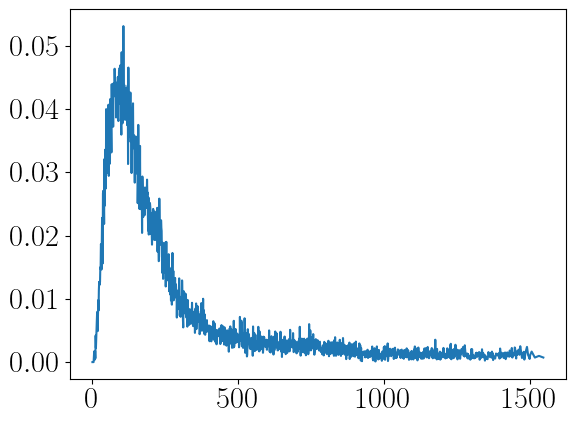

In [1101]:
plt.plot(x, y)
plt.xscale('log')
plt.yscale('log')

In [1083]:
gc = game.groupby('r')
gf = fgame.groupby('r')

xs = []
ys = []
legend = []

# for i in [16, 32, 64]:
#     t = gc.get_group(i).copy()
#     d = t.copy()
#     d['expect'] = t['expect'].astype(int)
#     x, y = gen_xy(d, colx='expect', coly='subopt', ignore=True, limit=1)
#     xs.append(x)
#     ys.append(y)
#     legend.append('rev$_{%d}$' % i)
    
for i in [32, 64, 128]:
    t = gf.get_group(i).copy()
    d = t.copy()
    d['expect'] = t['expect'].astype(int)
    x, y = gen_xy(d, colx='expect', coly='subopt', ignore=True, limit=1)
    xs.append(x)
    ys.append(y)
    legend.append('FS$_{%d}$' % i)

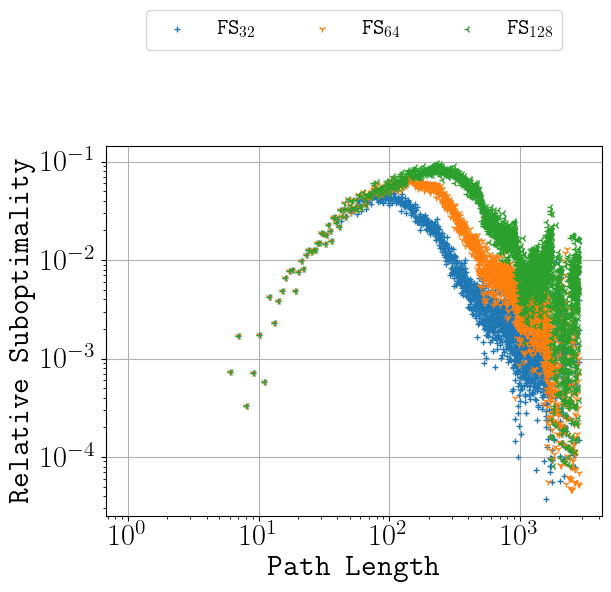

In [1084]:
import utilities as ut
ut.styles['rev$_{64}$'] = '^'
ut.styles['rev$_{32}$'] = '2'
ut.styles['rev$_{16}$'] = '.'
ut.styles['FS$_{128}$'] = '3'
ut.styles['FS$_{64}$'] = '1'
ut.styles['FS$_{32}$'] = '+'
plot_graph(xlabel='Path Length', ylabel='Relative Suboptimality', xs=xs, ys=ys, labels=legend, xscale='log')

## compare tcost

In [1033]:
bench = game[(game['r'] == 0) & (game['itype'] == 'forward')][['map', 'scenid', 'tcost']]
t = group_cpd(game[(game['r']>=16) & (game['itype'] == 'backward')], col='tcost')
t2 = group_cpd(fgame[fgame['r']>=32], col='tcost')
t3 = group_cpd(game[(game['r']>=16) & (game['itype'] == 'forward')], col='tcost')
bench.describe()

['itype', 'r', 'map', 'scenid', 'tcost']
['itype', 'r', 'map', 'scenid', 'tcost']
['itype', 'r', 'map', 'scenid', 'tcost']


,scenid,tcost
count,142534.000000,1.425340e+05
mean,1211.778684,1.821436e+04
std,1149.842920,2.189596e+04
min,0.000000,3.800000e+01
25%,369.000000,4.379000e+03
50%,858.000000,1.078980e+04
75%,1736.000000,2.306715e+04
max,7014.000000,1.761860e+06


In [1048]:
game[(game['itype'] == 'forward') & (game['r'] == 0)][['step-cost', 'tcost']].describe()

,step-cost,tcost
count,142534.000000,1.425340e+05
mean,43.739866,1.821436e+04
std,36.334860,2.189596e+04
min,13.393750,3.800000e+01
25%,25.501345,4.379000e+03
50%,32.088654,1.078980e+04
75%,46.731058,2.306715e+04
max,4165.153664,1.761860e+06


In [1044]:
game[game['itype'] == 'backward'][['step-cost', 'tcost']].describe()

,step-cost,tcost
count,994748.000000,994748.000000
mean,27.853548,8520.161567
std,25.767710,6987.303051
min,5.049612,44.000000
25%,15.567146,3367.600000
50%,21.732609,6511.600000
75%,31.018525,11510.600000
max,9238.244186,794489.000000


In [1034]:
merged = t.merge(t2, on=['map','scenid'], how='inner').merge(
    tgame[['tcost', 'map', 'scenid']], on=['map', 'scenid'], how='inner').rename(
        columns={'tcost': 'tcost-tree'}
    ).merge(bench, on=['map', 'scenid'], how='inner').merge(
    t3, on=['map','scenid'], how='inner'
)
merged.head()

,map,scenid,tcost-backward-16,tcost-backward-32,tcost-backward-64,tcost-focal-32,tcost-focal-64,tcost-focal-128,tcost-tree,tcost,tcost-forward-16,tcost-forward-32,tcost-forward-64
0,orz103d,0,1276.4,1594.4,2709.6,2237.4,2300.6,2104.0,575.4,343.4,715.2,826.8,1961.4
1,orz103d,1,1614.2,2401.0,925.4,669.6,672.8,794.0,64.6,106.6,810.2,1798.8,702.8
2,orz103d,2,1060.8,798.8,2032.8,937.2,878.8,1017.4,220.6,222.6,687.6,465.6,2158.2
3,orz103d,3,832.2,1841.0,1460.0,840.2,796.8,934.8,175.8,175.2,419.6,1177.8,1032.6
4,orz103d,4,1216.2,1301.6,2502.6,946.4,1005.0,1045.2,142.6,191.8,620.6,993.6,2292.4


In [1035]:
speedup = merged.set_index(['map', 'scenid']).apply(lambda x: x['tcost'] / x, axis=1)
speedup.head()

tcost-backward-16  tcost-backward-32  tcost-backward-64  \
map     scenid                                                            
orz103d 0                0.269038           0.215379           0.126735   
        1                0.066039           0.044398           0.115193   
        2                0.209842           0.278668           0.109504   
        3                0.210526           0.095166           0.120000   
        4                0.157704           0.147357           0.076640   

                tcost-focal-32  tcost-focal-64  tcost-focal-128  tcost-tree  \
map     scenid                                                                
orz103d 0             0.153482        0.149265         0.163213    0.596802   
        1             0.159200        0.158442         0.134257    1.650155   
        2             0.237516        0.253300         0.218793    1.009066   
        3             0.208522        0.219880         0.187420    0.996587   
        4             0.202663        0.190846         0.183506    1.345021   

                tcost  tcost-forward-16  tcost-forward-32  tcost-forward-64  
map     scenid                                                               
orz103d 0         1.0          0.480145          0.415336          0.175079  
        1         1.0          0.131572          0.059262          0.151679  
        2         1.0          0.323735          0.478093          0.103142  
        3         1.0          0.417541          0.148752          0.169669  
        4         1.0          0.309056          0.193035          0.083668

In [1036]:
desc = speedup.describe()
desc.head()

,tcost-backward-16,tcost-backward-32,tcost-backward-64,tcost-focal-32,tcost-focal-64,tcost-focal-128,tcost-tree,tcost,tcost-forward-16,tcost-forward-32,tcost-forward-64
count,142534.000000,142534.000000,142534.000000,142534.000000,142534.000000,142534.000000,142534.000000,142534.0,142534.000000,142534.000000,142534.000000
mean,1.839347,1.737801,1.579660,0.036719,0.039262,0.041196,6.951274,1.0,1.208865,1.232773,1.230339
std,1.137899,1.122575,1.085569,0.100846,0.098708,0.100537,5.054169,0.0,0.699635,0.707281,0.707115
min,0.060521,0.030653,0.007566,0.000009,0.000004,0.000003,0.009008,1.0,0.013453,0.033141,0.011814
25%,1.310645,1.194009,0.997682,0.000563,0.000275,0.000166,4.569717,1.0,1.037776,1.041022,1.012789


In [1037]:
desc.round(3).drop(columns=['tcost']).T.drop(columns=['count', 'std'])

,mean,min,25%,50%,75%,max
tcost-backward-16,1.839,0.061,1.311,1.747,2.162,235.606
tcost-backward-32,1.738,0.031,1.194,1.666,2.091,229.882
tcost-backward-64,1.580,0.008,0.998,1.490,1.953,207.992
tcost-focal-32,0.037,0.000,0.001,0.002,0.025,18.451
tcost-focal-64,0.039,0.000,0.000,0.001,0.047,17.233
tcost-focal-128,0.041,0.000,0.000,0.002,0.051,17.431
tcost-tree,6.951,0.009,4.570,5.961,8.170,949.790
tcost-forward-16,1.209,0.013,1.038,1.125,1.312,175.824
tcost-forward-32,1.233,0.033,1.041,1.144,1.355,163.937
tcost-forward-64,1.230,0.012,1.013,1.139,1.389,184.361


In [1010]:
print (desc.round(3).drop(columns=['tcost']).T.drop(columns=['count', 'std']).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &   mean &    min &    25\% &    50\% &    75\% &      max \\
\midrule
tcost-backward-16 &  1.789 &  0.061 &  1.214 &  1.691 &  2.134 &  235.606 \\
tcost-backward-32 &  1.700 &  0.031 &  1.119 &  1.613 &  2.065 &  229.882 \\
tcost-backward-64 &  1.550 &  0.008 &  0.965 &  1.439 &  1.930 &  207.992 \\
tcost-focal-32    &  0.037 &  0.000 &  0.001 &  0.002 &  0.028 &   18.451 \\
tcost-focal-64    &  0.040 &  0.000 &  0.000 &  0.001 &  0.048 &   17.233 \\
tcost-focal-128   &  0.043 &  0.000 &  0.000 &  0.002 &  0.053 &   17.431 \\
tcost-tree        &  6.860 &  0.009 &  4.419 &  5.812 &  8.057 &  949.790 \\
tcost-forward-16  &  1.212 &  0.013 &  1.038 &  1.121 &  1.311 &  175.824 \\
tcost-forward-32  &  1.240 &  0.033 &  1.042 &  1.140 &  1.355 &  163.937 \\
tcost-forward-64  &  1.244 &  0.012 &  1.015 &  1.140 &  1.390 &  184.361 \\
\bottomrule
\end{tabular}



## CPD Access

In [ ]:
def vary_r_cpd(cpd_df, index=['map', 'itype'], col='tcost'):
    gr_cpd = cpd_df.groupby("r")
    tmps = []
    keys = sorted(gr_cpd.groups.keys())
    for k in keys:
        d = gr_cpd.get_group(k)[index + [col]]
        tmps.append(d.groupby(index).median().rename(columns={col: "%s-%d" % (col, k)}))
    from functools import reduce
    return reduce(lambda df1, df2: df1.join(df2, on=index), tmps)

In [ ]:
vary_r_cpd(focal, col='tcost').round(6).head()

In [ ]:
cpd.groupby(["r", "itype"])["step-cost"].describe().drop(columns=['count'])

In [ ]:
b = cpd[cpd['itype'] == 'backward'].sort_values('steps')

In [ ]:
b.shape

In [ ]:
grb = b.groupby('steps')

In [ ]:
ut.styles['forward'] = 'g-.'
ut.styles['reverse'] = 'r:'
xs, ys = [], []
xs.append(grb['steps'].mean())
ys.append(grb['steps'].mean())

xs.append(grb['steps'].mean())
ys.append(grb['access'].mean())

plot_graph(xs=xs, ys=ys, labels=['forward', 'reverse'], yscale='linear',
           xlabel='Steps in Path', ylabel='\#CPD Extractions', saveto='pics/steps-access.pdf')

In [ ]:
ut.styles['forward'] = 'g-.'
ut.styles['reverse'] = 'r:'
xs, ys = [], []
xs.append(range(b.shape[0]))
ys.append(sorted(b['steps']))

xs.append(range(b.shape[0]))
ys.append(sorted(b['access']))

plot_graph(xs=xs, ys=ys, labels=['forward', 'reverse'], yscale='linear',
           xlabel='Queries', ylabel='CPD Extraction', saveto='pics/access-dist.pdf')

# Experiment: cpd size

In [791]:
size = load_size("../analysis/size_all.txt")
size['size'] = size['size'].astype(float)
size['mtype'] = size['map'].apply(lambda x: mtype(x))
idx = size.set_index(['map', 'r', 'itype'])

## total size of each map set

In [1123]:
t = size.copy()
t['itype'] = t['itype'].apply(lambda x: {'backward': 'rev', 'forward': 'fwd'}[x])
t.head()

,map,itype,r,size,mtype
0,AcrosstheCape,fwd,16,32013742.0,sc1
1,AcrosstheCape,rev,16,24760386.0,sc1
2,AcrosstheCape,fwd,2,92890642.0,sc1
3,AcrosstheCape,rev,2,914294026.0,sc1
4,AcrosstheCape,fwd,32,23636042.0,sc1


In [1124]:
z = (t.groupby(["mtype", "r", "itype"]).agg(np.sum) / 1000000).round(2).unstack(level=1)
z

size                                                  
r                   0        2        4       8       16      32      64
mtype  itype                                                            
da2    fwd       59.84    60.59    51.37   43.93   38.96   35.89   33.80
       rev     1928.73   376.95   106.75   45.03   24.06   16.98   14.52
dao    fwd       68.46    67.42    54.18   41.72   33.86   30.12   27.68
       rev     3477.94   665.34   170.30   63.47   28.09   16.39   12.41
maze   fwd        4.24     4.68     4.50    4.38    4.20    4.06    3.95
       rev     3871.72   744.87   241.49  113.62   45.52   20.09    9.43
random fwd       41.38    34.76    27.86   21.56   15.44    9.76    5.85
       rev     5226.91  1635.79   608.03  229.26   80.39   24.37    6.63
room   fwd       75.31    70.32    44.74   26.17   15.57   10.64    7.93
       rev     2170.54   392.66    95.15   32.16   10.65    4.59    2.71
sc1    fwd      959.71   923.96   717.35  454.34  273.00  200.23  166.54
       rev    41984.40  7776.52  1839.11  604.37  213.32   93.95   56.79

In [1125]:
print (z.to_latex())

\begin{tabular}{llrrrrrrr}
\toprule
    & {} & \multicolumn{7}{l}{size} \\
    & r &        0  &       2  &       4  &      8  &      16 &      32 &      64 \\
mtype & itype &           &          &          &         &         &         &         \\
\midrule
da2 & fwd &     59.84 &    60.59 &    51.37 &   43.93 &   38.96 &   35.89 &   33.80 \\
    & rev &   1928.73 &   376.95 &   106.75 &   45.03 &   24.06 &   16.98 &   14.52 \\
dao & fwd &     68.46 &    67.42 &    54.18 &   41.72 &   33.86 &   30.12 &   27.68 \\
    & rev &   3477.94 &   665.34 &   170.30 &   63.47 &   28.09 &   16.39 &   12.41 \\
maze & fwd &      4.24 &     4.68 &     4.50 &    4.38 &    4.20 &    4.06 &    3.95 \\
    & rev &   3871.72 &   744.87 &   241.49 &  113.62 &   45.52 &   20.09 &    9.43 \\
random & fwd &     41.38 &    34.76 &    27.86 &   21.56 &   15.44 &    9.76 &    5.85 \\
    & rev &   5226.91 &  1635.79 &   608.03 &  229.26 &   80.39 &   24.37 &    6.63 \\
room & fwd &     75.31 &    70.32 &    4

In [1126]:
maps = list(
size[size.apply(lambda x: 
            x['r'] > 32 and 
            x['itype'] == 'forward' and
            x['size'] > idx.loc[x['map'], 0, 'forward']['size'], 
            axis=1)]['map'])

size[size.apply(lambda x: x['map'] in maps and x['r'] == 0 and x['itype'] == 'forward', axis=1)]

,map,itype,r,size,mtype
866,lt_ruinedhouse_n,forward,0,21846.0,da2
964,maze-100-1,forward,0,133306.0,maze
1062,orz105d,forward,0,14754.0,dao
1090,orz107d,forward,0,14638.0,dao
1132,orz203d,forward,0,5150.0,dao


In [1127]:
maps = list(
size[size.apply(lambda x: 
            x['r'] > 32 and 
            x['itype'] == 'backward' and
            x['size'] > idx.loc[x['map'], 0, 'forward']['size'], 
            axis=1)]['map'])

size[size.apply(lambda x: x['map'] in maps and x['r'] == 0 and x['itype'] == 'backward', axis=1)]

,map,itype,r,size,mtype
965,maze-100-1,backward,0,9.655046e+06,maze
979,maze-400-4,backward,0,3.862066e+09,maze


In [1128]:
t = size[size.apply(lambda x: 
                    x['r'] > 0 and 
                    x['size'] < idx.loc[x['map'], 0, 'forward']['size'], 
                    axis=1)]
t2 = size[size.apply(lambda x: 
                     x['r'] > 0 and 
                     x['size'] < idx.loc[x['map'], x['r'], 'forward']['size'], 
                     axis=1)]


In [1129]:
a = t[t['itype'] == 'forward']['r'].value_counts()
b = t[t['itype'] == 'backward']['r'].value_counts()
c = t2['r'].value_counts()

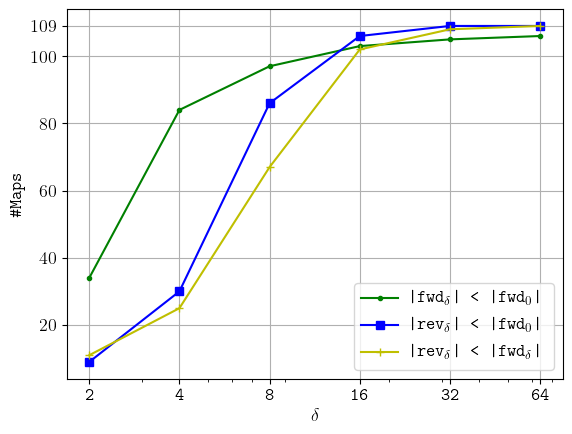

In [1122]:
saveto = "pics/catch-plot.pdf"
fig, ax = plt.subplots()
ax.set_xscale('log')
# ax.set_yscale("log")
ax.set_ylabel('\#Maps')
ax.set_xlabel('$\delta$')
labels = [
#           'all maps',
          '|fwd$_\delta$| < |fwd$_0$|',
          '|rev$_\delta$| < |fwd$_0$|',
          '|rev$_\delta$| < |fwd$_\delta$|',
          ]
plt.rc('font', size=13)
plt.grid(True)
# plt.yticks([2, 4, 8, 16, 32, 64], [2, 4, 8, 16, 32, 64])
# plt.xticks([20, 40, 60, 80, 100, 109], [20, 40, 60, 80, 100, 109])
plt.xticks([2, 4, 8, 16, 32, 64], [2, 4, 8, 16, 32, 64])
plt.yticks([20, 40, 60, 80, 100, 109])

# plt.plot(list(c.index), [111] * len(c.values), 'r', label='all maps')
plt.plot(list(a.index), list(a.values), 'g.-', label=labels[0])
plt.plot(list(b.index), list(b.values), 'b-s', label=labels[1])
plt.plot(list(c.index), list(c.values), 'y+-', label=labels[2])
ax.legend(labels)

fig.savefig(saveto, bbox_inches='tight')

In [510]:
maplist = [
    #'room-100-10', 
    'room-400-40', 
    #'room-100-33', 
    'random-400-33',
    #'maze-100-1', kj
    'maze-400-4', 
    'Aurora', 
    'orz103d']
t = (size[size['map'].apply(lambda x: x in maplist)].set_index(['map', 'r', 'itype']) / 1000000)
t.head()

size
map    r  itype                
Aurora 16 forward     72.656014
          backward    48.875342
       2  forward    320.084486
          backward  1892.165186
       32 forward     51.658874

In [136]:
t.unstack(level=0).T.round(2)

r                         0                2                4           \
itype               backward forward backward forward backward forward   
     map                                                                 
size Aurora         10015.22  341.81  1892.17  320.08   448.44  225.17   
     maze-400-4      3862.07    4.10   741.37    4.52   239.81    4.35   
     orz103d          176.16    1.40    35.22    1.51     9.78    1.42   
     random-400-33   5208.14   40.77  1629.89   34.21   605.78   27.40   
     room-400-40     2149.96   74.24   388.23   69.40    93.68   44.11   

r                        8                16               32          \
itype              backward forward backward forward backward forward   
     map                                                                
size Aurora          139.63  123.01    48.88   72.66    19.90   51.66   
     maze-400-4      112.76    4.23    45.07    4.05    19.85    3.91   
     orz103d           3.79    1.37     1.74    1.32     0.94    1.27   
     random-400-33   228.36   21.19    80.01   15.14    24.19    9.52   
     room-400-40      31.46   25.64    10.38   15.17     4.43   10.31   

r                        64          
itype              backward forward  
     map                             
size Aurora           10.54   40.20  
     maze-400-4        9.29    3.81  
     orz103d           0.68    1.24  
     random-400-33     6.52    5.66  
     room-400-40       2.60    7.70

In [137]:
print(t.unstack(level=0).T.round(2).to_latex())

\begin{tabular}{llrrrrrrrrrrrrrr}
\toprule
     & r & \multicolumn{2}{l}{0} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{4} & \multicolumn{2}{l}{8} & \multicolumn{2}{l}{16} & \multicolumn{2}{l}{32} & \multicolumn{2}{l}{64} \\
     & itype &  backward & forward & backward & forward & backward & forward & backward & forward & backward & forward & backward & forward & backward & forward \\
{} & map &           &         &          &         &          &         &          &         &          &         &          &         &          &         \\
\midrule
size & Aurora &  10015.22 &  341.81 &  1892.17 &  320.08 &   448.44 &  225.17 &   139.63 &  123.01 &    48.88 &   72.66 &    19.90 &   51.66 &    10.54 &   40.20 \\
     & maze-400-4 &   3862.07 &    4.10 &   741.37 &    4.52 &   239.81 &    4.35 &   112.76 &    4.23 &    45.07 &    4.05 &    19.85 &    3.91 &     9.29 &    3.81 \\
     & orz103d &    176.16 &    1.40 &    35.22 &    1.51 &     9.78 &    1.42 &     3.79 &    1.37 &     1

In [1133]:
def vary_r_size(size_df, index=['map', 'mtype']):
    gr_size = size_df.groupby(["r", "itype"])
    tmps = []
    keys = sorted(gr_size.groups.keys())
    for k in keys:
        d = gr_size.get_group(k)
        tmps.append(d.rename(columns={'size': "size-%s-%d" % (k[1], k[0])}).drop(columns=['r', 'itype']).set_index(index))
    from functools import reduce
    return reduce(lambda df1, df2: df1.join(df2, on=index), tmps)

In [1134]:
t = vary_r_size(size) / 1000000
t.head()

,,size-backward-0,size-forward-0,size-backward-2,size-forward-2,size-backward-4,size-forward-4,size-backward-8,size-forward-8,size-backward-16,size-forward-16,size-backward-32,size-forward-32,size-backward-64,size-forward-64
map,mtype,,,,,,,,,,,,,,
AcrosstheCape,sc1,5017.973234,95.012098,914.294026,92.890642,213.731174,76.104510,71.264962,52.246578,24.760386,32.013742,10.879242,23.636042,6.745170,19.734734
Aftershock,sc1,904.784882,9.154178,167.054006,9.570766,40.391402,8.779714,14.612938,7.830850,5.897770,7.014854,3.308162,6.597922,2.454334,6.251534
Archipelago,sc1,1019.821174,36.048874,190.495778,34.923570,47.114250,27.540142,16.234210,17.551922,6.112110,10.068602,3.170622,7.549510,2.190694,6.375086
ArcticStation,sc1,5185.188514,35.683042,971.878522,36.081198,230.050854,31.362454,75.160794,23.841758,26.799850,18.523446,11.765746,16.467278,7.272430,15.596538
Aurora,sc1,10015.215026,341.811670,1892.165186,320.084486,448.440330,225.174162,139.630718,123.009318,48.875342,72.656014,19.900366,51.658874,10.539502,40.204698


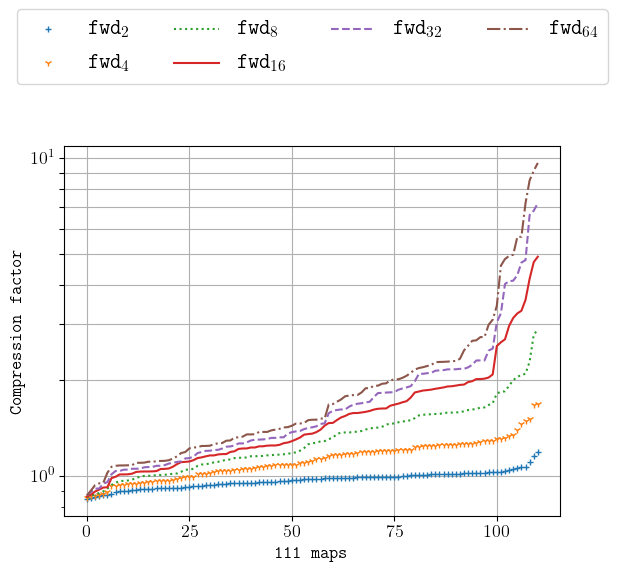

In [1135]:
import utilities as ut
ut.styles['fwd$_{64}$'] = '-.'
ut.styles['fwd$_{32}$'] = '--'
ut.styles['fwd$_{16}$'] = '-'
ut.styles['fwd$_{8}$'] = ':'
ut.styles['fwd$_{4}$'] = '1'
ut.styles['fwd$_{2}$'] = '+'

xs, ys, labels = [], [], []
#ylabel = '|fwd$_0$| vs |fwd$_\delta$|'
ylabel = 'Compression factor'
k0 = 'size-forward-0'
for i in [2, 4, 8, 16, 32, 64]:
    for j in ["forward"]:
        k = 'size-%s-%d' % (j, i)
        xs.append(range(t[k].size))
        ys.append(sorted(t[k0].values / t[k].values))
        labels.append('%s$_{%d}$' % ("fwd", i))
plot_graph(xlabel='111 maps', ylabel=ylabel, xs=xs, ys=ys, 
           yticks=np.arange(0, 11),
           labels=labels, saveto='./pics/fwd0-fwd.pdf', yscale='log')

In [1137]:
t2 = pd.DataFrame()
for i in [0, 2, 4, 8, 16, 32, 64]:
    k0 = 'size-forward-0'
    k = 'size-backward-%d' % i
    t2[i] = t[k0].values / t[k].values

In [1146]:
t2.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
0,111.0,0.096,0.158,0.001,0.024,0.039,0.073,1.017
2,111.0,0.332,0.348,0.006,0.121,0.198,0.347,1.571
4,111.0,0.822,0.529,0.017,0.446,0.716,1.052,2.341
8,111.0,1.540,0.654,0.036,1.134,1.562,1.991,3.449
16,111.0,2.590,1.184,0.091,1.871,2.478,3.117,7.392
32,111.0,3.808,2.795,0.207,2.386,3.175,4.164,17.882
64,111.0,4.930,5.048,0.442,2.701,3.642,5.120,32.431


In [1139]:
print (t2.describe().round(2).T.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &  mean &   std &   min &   25\% &   50\% &   75\% &    max \\
\midrule
0  &  111.0 &  0.10 &  0.16 &  0.00 &  0.02 &  0.04 &  0.07 &   1.02 \\
2  &  111.0 &  0.33 &  0.35 &  0.01 &  0.12 &  0.20 &  0.35 &   1.57 \\
4  &  111.0 &  0.82 &  0.53 &  0.02 &  0.45 &  0.72 &  1.05 &   2.34 \\
8  &  111.0 &  1.54 &  0.65 &  0.04 &  1.13 &  1.56 &  1.99 &   3.45 \\
16 &  111.0 &  2.59 &  1.18 &  0.09 &  1.87 &  2.48 &  3.12 &   7.39 \\
32 &  111.0 &  3.81 &  2.79 &  0.21 &  2.39 &  3.18 &  4.16 &  17.88 \\
64 &  111.0 &  4.93 &  5.05 &  0.44 &  2.70 &  3.64 &  5.12 &  32.43 \\
\bottomrule
\end{tabular}



In [1140]:
t3 = pd.DataFrame()
for i in [0, 2, 4, 8, 16, 32, 64]:
    k0 = 'size-forward-0'
    k = 'size-forward-%d' % i
    t3[i] = t[k0].values / t[k].values
t3.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
0,111.0,1.000,0.000,1.000,1.000,1.000,1.000,1.000
2,111.0,0.974,0.058,0.848,0.933,0.980,1.008,1.192
4,111.0,1.132,0.160,0.853,1.017,1.118,1.242,1.683
8,111.0,1.342,0.367,0.859,1.083,1.270,1.561,2.896
16,111.0,1.603,0.739,0.863,1.143,1.361,1.862,4.895
32,111.0,1.835,1.158,0.870,1.187,1.425,2.103,7.202
64,111.0,2.075,1.596,0.870,1.240,1.505,2.210,9.646


In [1141]:
t3.describe().round(2).T.drop(columns=['std', 'count'])

,mean,min,25%,50%,75%,max
0,1.00,1.00,1.00,1.00,1.00,1.00
2,0.97,0.85,0.93,0.98,1.01,1.19
4,1.13,0.85,1.02,1.12,1.24,1.68
8,1.34,0.86,1.08,1.27,1.56,2.90
16,1.60,0.86,1.14,1.36,1.86,4.90
32,1.84,0.87,1.19,1.42,2.10,7.20
64,2.08,0.87,1.24,1.50,2.21,9.65


In [1142]:
print (t3.describe().round(2).T.drop(columns=['std', 'count']).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  mean &   min &   25\% &   50\% &   75\% &   max \\
\midrule
0  &  1.00 &  1.00 &  1.00 &  1.00 &  1.00 &  1.00 \\
2  &  0.97 &  0.85 &  0.93 &  0.98 &  1.01 &  1.19 \\
4  &  1.13 &  0.85 &  1.02 &  1.12 &  1.24 &  1.68 \\
8  &  1.34 &  0.86 &  1.08 &  1.27 &  1.56 &  2.90 \\
16 &  1.60 &  0.86 &  1.14 &  1.36 &  1.86 &  4.90 \\
32 &  1.84 &  0.87 &  1.19 &  1.42 &  2.10 &  7.20 \\
64 &  2.08 &  0.87 &  1.24 &  1.50 &  2.21 &  9.65 \\
\bottomrule
\end{tabular}



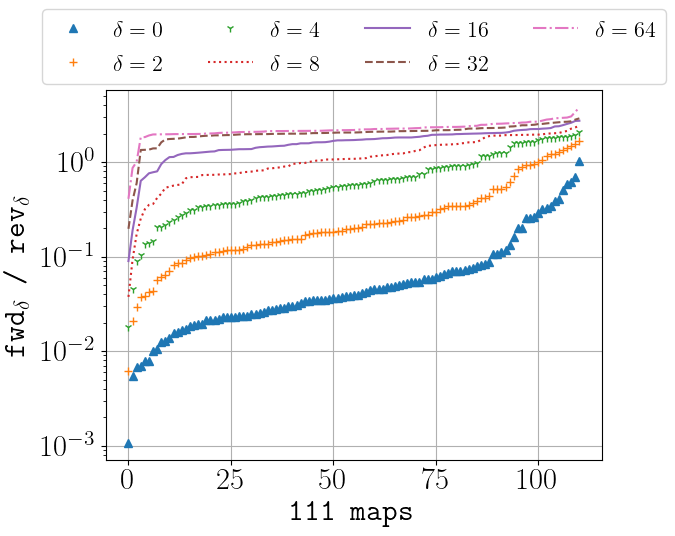

In [555]:
ut.styles['$\delta=64$'] = '-.'
ut.styles['$\delta=32$'] = '--'
ut.styles['$\delta=16$$'] = '-'
ut.styles['$\delta=8$'] = ':'
ut.styles['$\delta=4$'] = '1'
ut.styles['$\delta=2$'] = '+'
ut.styles['$\delta=0$'] = '^'
xs, ys, labels = [], [], []
#ylabel = '|fwd$_\delta$| vs |rev$_\delta$|'
ylabel = 'fwd$_\delta$ / rev$_\delta$'
for i in [0, 2, 4, 8, 16, 32, 64]:
    for j in ["backward"]:
        k0 = 'size-forward-%d' % i
        k = 'size-%s-%d' % (j, i)
        xs.append(range(t[k].size))
        ys.append(sorted(t[k0].values / t[k].values))
        labels.append('$\delta=%d$' % i)
plot_graph(xlabel='111 maps', ylabel=ylabel, xs=xs, ys=ys, yscale='log',
#           yticks=(np.arange(0,4), [str(i) for i in range(5)]),
           labels=labels, saveto='./pics/fwd-bwd.pdf',
           bbox_to_anchor=(0.5, 1.25))

In [ ]:
print(
pd.DataFrame.from_dict({
        '32': t['size-forward-32'] / t['size-backward-32'],
        '64': t['size-forward-64'] / t['size-backward-64']}).describe().round(2).to_latex()
)

In [ ]:
(vary_r_size(maze_sz).T / 1000000).round(2)

In [ ]:
(vary_r_size(room_sz).T / 1000000).round(2)

In [ ]:
(vary_r_size(random_sz).T / 1000000).round(2)

## CPD Centroid

In [448]:
cnums = pd.read_csv("cnums.txt")
cnums['ratio'] = cnums['cnums'] / cnums['size']
cnums.head()

,map,r,cnums,size,ratio
0,AcrosstheCape,0,392287,392287,1.000000
1,AcrosstheCape,2,71199,392287,0.181497
2,AcrosstheCape,4,16417,392287,0.041849
3,AcrosstheCape,8,5266,392287,0.013424
4,AcrosstheCape,16,1627,392287,0.004147


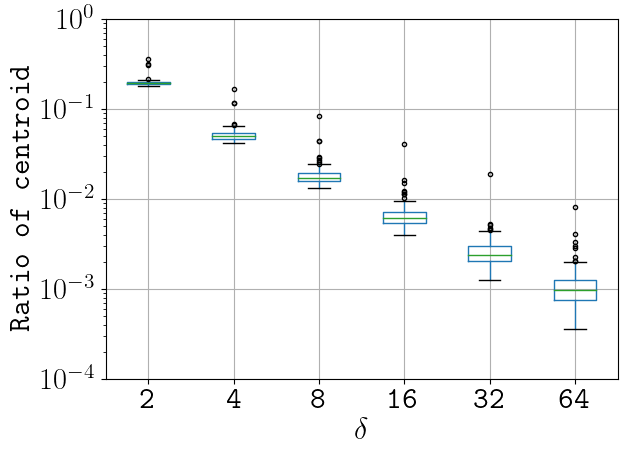

In [966]:
cnums[cnums['r']>0].boxplot(column="ratio", by="r", sym='.')
plt.title("")
plt.suptitle("")
plt.xlabel("$\delta$")
plt.ylabel("Ratio of centroid")
plt.yscale("log")
plt.ylim([0.0001, 1])
plt.savefig('pics/cnums-ratio-boxplot.pdf', bbox_inches='tight')

In [210]:
t = (cnums.drop(columns=['size', 'ratio']).set_index(['map','r']).unstack(level=0).T).reset_index().drop(columns='level_0')
t.sort_values('map').head()

r,map,0,2,4,8,16,32,64
0,AcrosstheCape,392287,71199,16417,5266,1627,538,215
1,Aftershock,166076,30325,7042,2312,716,242,88
2,Archipelago,131770,24451,5898,1898,587,206,79
3,ArcticStation,400071,74697,17434,5485,1754,598,253
4,Aurora,493772,93346,22078,6777,2278,837,372


In [203]:
maplist = [
    #'room-100-10', 
    'room-400-40', 
    #'room-100-33', 
    'random-400-33',
    #'maze-100-1', 
    'maze-400-4', 
    'Aurora', 
    'orz103d']
t[t['map'].apply(lambda x: x in maplist)].sort_values('map')

r,map,0,2,4,8,16,32,64
4,Aurora,493772,93346,22078,6777,2278,837,372
69,maze-400-4,127996,24526,7899,3687,1443,607,257
74,orz103d,40392,7977,2134,759,287,105,44
98,random-400-33,103535,32381,12019,4515,1566,456,105
100,room-400-40,152811,27480,6524,2111,615,190,55


In [211]:
print (t[t['map'].apply(lambda x: x in maplist)].sort_values('map').to_latex())

\begin{tabular}{llrrrrrrr}
\toprule
r &            map &       0 &      2 &      4 &     8 &    16 &   32 &   64 \\
\midrule
4   &         Aurora &  493772 &  93346 &  22078 &  6777 &  2278 &  837 &  372 \\
69  &     maze-400-4 &  127996 &  24526 &   7899 &  3687 &  1443 &  607 &  257 \\
74  &        orz103d &   40392 &   7977 &   2134 &   759 &   287 &  105 &   44 \\
98  &  random-400-33 &  103535 &  32381 &  12019 &  4515 &  1566 &  456 &  105 \\
100 &    room-400-40 &  152811 &  27480 &   6524 &  2111 &   615 &  190 &   55 \\
\bottomrule
\end{tabular}



In [213]:
t = size[size['map'].apply(lambda x: x in maplist)]
t.head()

,map,itype,r,size
56,Aurora,forward,16,7.265601e+07
57,Aurora,backward,16,4.887534e+07
58,Aurora,forward,2,3.200845e+08
59,Aurora,backward,2,1.892165e+09
60,Aurora,forward,32,5.165887e+07


In [236]:
z = t.copy()
z['itype'] = t['itype'].apply(lambda x: {'backward': 'R', 'forward': 'F'}[x])

In [238]:
(z.set_index(['map', 'r', 'itype']).unstack(level=0).T / 1000000).round(2).reset_index().drop(columns=['level_0'])

r                map       0                 2                4          \
itype                      F         R       F        R       F       R   
0             Aurora  341.81  10015.22  320.08  1892.17  225.17  448.44   
1         maze-400-4    4.10   3862.07    4.52   741.37    4.35  239.81   
2            orz103d    1.40    176.16    1.51    35.22    1.42    9.78   
3      random-400-33   40.77   5208.14   34.21  1629.89   27.40  605.78   
4        room-400-40   74.24   2149.96   69.40   388.23   44.11   93.68   

r           8             16            32            64         
itype       F       R      F      R      F      R      F      R  
0      123.01  139.63  72.66  48.88  51.66  19.90  40.20  10.54  
1        4.23  112.76   4.05  45.07   3.91  19.85   3.81   9.29  
2        1.37    3.79   1.32   1.74   1.27   0.94   1.24   0.68  
3       21.19  228.36  15.14  80.01   9.52  24.19   5.66   6.52  
4       25.64   31.46  15.17  10.38  10.31   4.43   7.70   2.60

In [239]:
print ((z.set_index(['map', 'r', 'itype']).unstack(level=0).T / 1000000).round(2).reset_index().drop(columns=['level_0']).to_latex())

\begin{tabular}{llrrrrrrrrrrrrrr}
\toprule
r &            map & \multicolumn{2}{l}{0} & \multicolumn{2}{l}{2} & \multicolumn{2}{l}{4} & \multicolumn{2}{l}{8} & \multicolumn{2}{l}{16} & \multicolumn{2}{l}{32} & \multicolumn{2}{l}{64} \\
itype &       F &         R &       F &        R &       F &       R &       F &       R &      F &      R &      F &      R &      F &      R \\
\midrule
0 &         Aurora &  341.81 &  10015.22 &  320.08 &  1892.17 &  225.17 &  448.44 &  123.01 &  139.63 &  72.66 &  48.88 &  51.66 &  19.90 &  40.20 &  10.54 \\
1 &     maze-400-4 &    4.10 &   3862.07 &    4.52 &   741.37 &    4.35 &  239.81 &    4.23 &  112.76 &   4.05 &  45.07 &   3.91 &  19.85 &   3.81 &   9.29 \\
2 &        orz103d &    1.40 &    176.16 &    1.51 &    35.22 &    1.42 &    9.78 &    1.37 &    3.79 &   1.32 &   1.74 &   1.27 &   0.94 &   1.24 &   0.68 \\
3 &  random-400-33 &   40.77 &   5208.14 &   34.21 &  1629.89 &   27.40 &  605.78 &   21.19 &  228.36 &  15.14 &  80.01 &   9.52 &  

# Inspect illegal move

In [ ]:
with open("../analysis/pure-size.txt", "r") as f:
    lines = f.readlines()

rows = []
for line in lines:
    num, fname = line.strip().split('\t')
    fname = fname.replace("-pure-", "-").replace("index_data/", "").replace("-pure", "")
    data = parse_index_name(fname)
    rows.append([data['map'], data['r'], data['itype'], int(num)])
pure = pd.DataFrame.from_records(rows, columns=['map', 'r', 'itype', 'size'])
pure.head()

In [ ]:
x = (pure[pure['itype']=='backward'].drop(columns=['itype']).set_index(['map','r']).unstack(level=0).T / 1000000).round(2)

In [ ]:
print(x.reset_index().drop(columns=['level_0']).to_latex())

# Dijkstra cost

In [974]:
raw_dij = load_files(["dijkstra-tcost.txt"])

dijkstra-tcost.txt


In [975]:
dij = (raw_dij.groupby(['map', 'source']).mean() / 1000000000).drop(columns=['i']).reset_index()
dij['fwd'] = dij['s'] + dij['h'] + dij['w']
dij['rev'] = dij['s'] + dij['h'] + dij['e']
dij['mtype'] = dij['map'].apply(lambda x: mtype(x))
dij.head()

,map,source,s,h,w,e,fwd,rev,mtype
0,AcrosstheCape,130,0.050899,0.001974,0.000029,0.002315,0.052902,0.055188,sc1
1,AcrosstheCape,2145,0.044487,0.001961,0.000029,0.002298,0.046477,0.048746,sc1
2,AcrosstheCape,4142,0.051669,0.001972,0.000023,0.002304,0.053664,0.055945,sc1
3,AcrosstheCape,6296,0.050250,0.001979,0.000022,0.002317,0.052251,0.054547,sc1
4,AcrosstheCape,10635,0.044029,0.001950,0.000046,0.002302,0.046026,0.048281,sc1


## total build time of each map set

In [976]:
df1 = cnums.copy()
df2 = dij.groupby('map').agg(np.average)
merged = df1.set_index('map').join(df2, on='map', how='outer').reset_index()
merged['mtype'] = merged['map'].apply(lambda x: mtype(x))
merged['fwd'] *= merged['cnums']
merged['rev'] *= merged['cnums']

In [977]:
z = (merged.drop(
    columns=['ratio', 'source', 's', 'h', 'w', 'e', 'size', 'cnums']
).groupby(['mtype', 'r']).agg(np.average).unstack(level=0).T / 60.0).round(2).swaplevel().sort_index()
z

r               0      2     4     8     16    32    64
mtype                                                  
da2    fwd    0.48   0.09  0.02  0.01  0.00  0.00  0.00
       rev    0.54   0.10  0.03  0.01  0.00  0.00  0.00
dao    fwd    3.11   0.58  0.14  0.05  0.02  0.01  0.00
       rev    3.37   0.63  0.15  0.05  0.02  0.01  0.00
maze   fwd   12.89   2.47  0.80  0.37  0.15  0.06  0.03
       rev   14.50   2.78  0.90  0.42  0.16  0.07  0.03
random fwd    8.32   2.60  0.97  0.36  0.13  0.04  0.01
       rev   11.87   3.71  1.38  0.52  0.18  0.05  0.01
room   fwd   21.78   3.92  0.93  0.30  0.09  0.03  0.01
       rev   22.94   4.13  0.98  0.32  0.09  0.03  0.01
sc1    fwd  218.86  40.38  9.42  2.99  0.95  0.33  0.14
       rev  229.23  42.30  9.86  3.13  0.99  0.34  0.14

In [978]:
print (
z.to_latex()
)

\begin{tabular}{llrrrrrrr}
\toprule
    & r &      0  &     2  &    4  &    8  &    16 &    32 &    64 \\
mtype & {} &         &        &       &       &       &       &       \\
\midrule
da2 & fwd &    0.48 &   0.09 &  0.02 &  0.01 &  0.00 &  0.00 &  0.00 \\
    & rev &    0.54 &   0.10 &  0.03 &  0.01 &  0.00 &  0.00 &  0.00 \\
dao & fwd &    3.11 &   0.58 &  0.14 &  0.05 &  0.02 &  0.01 &  0.00 \\
    & rev &    3.37 &   0.63 &  0.15 &  0.05 &  0.02 &  0.01 &  0.00 \\
maze & fwd &   12.89 &   2.47 &  0.80 &  0.37 &  0.15 &  0.06 &  0.03 \\
    & rev &   14.50 &   2.78 &  0.90 &  0.42 &  0.16 &  0.07 &  0.03 \\
random & fwd &    8.32 &   2.60 &  0.97 &  0.36 &  0.13 &  0.04 &  0.01 \\
    & rev &   11.87 &   3.71 &  1.38 &  0.52 &  0.18 &  0.05 &  0.01 \\
room & fwd &   21.78 &   3.92 &  0.93 &  0.30 &  0.09 &  0.03 &  0.01 \\
    & rev &   22.94 &   4.13 &  0.98 &  0.32 &  0.09 &  0.03 &  0.01 \\
sc1 & fwd &  218.86 &  40.38 &  9.42 &  2.99 &  0.95 &  0.33 &  0.14 \\
    & rev &  22

## build time of each map

In [979]:
dij_gr = dij.drop(columns=['source']).groupby(['map'])

In [980]:
fwd = (dij_gr.describe()['fwd']).round(3).drop(columns=['count'])['mean']
fwd.head()

map
AcrosstheCape    0.053
Aftershock       0.021
Archipelago      0.015
ArcticStation    0.051
Aurora           0.067
Name: mean, dtype: float64

In [981]:
rev = (dij_gr.describe()['rev']).round(3).drop(columns=['count'])['mean']
rev.head()

map
AcrosstheCape    0.055
Aftershock       0.022
Archipelago      0.015
ArcticStation    0.053
Aurora           0.070
Name: mean, dtype: float64

In [982]:
t = (cnums.drop(columns=['size', 'ratio']).set_index(['map','r']).unstack(level=0).T).reset_index().drop(columns='level_0')
t = t[t['map'].apply(lambda x: x in maplist)].sort_values('map')

In [983]:
build = t.set_index('map')

In [984]:
for i in [0, 2, 4, 8, 16, 32, 64]:
    build["F%d" % i] = build[i] * fwd / 60.0
    build["R%d" % i] = build[i] * rev / 60.0

In [985]:
build.drop(columns=[0,2,4,8,16,32,64]).round(2)

r,F0,R0,F2,R2,F4,R4,F8,R8,F16,R16,F32,R32,F64,R64
map,,,,,,,,,,,,,,
Aurora,551.38,576.07,104.24,108.90,24.65,25.76,7.57,7.91,2.54,2.66,0.93,0.98,0.42,0.43
maze-400-4,25.60,29.87,4.91,5.72,1.58,1.84,0.74,0.86,0.29,0.34,0.12,0.14,0.05,0.06
orz103d,2.02,2.02,0.40,0.40,0.11,0.11,0.04,0.04,0.01,0.01,0.01,0.01,0.00,0.00
random-400-33,17.26,24.16,5.40,7.56,2.00,2.80,0.75,1.05,0.26,0.37,0.08,0.11,0.02,0.02
room-400-40,43.30,45.84,7.79,8.24,1.85,1.96,0.60,0.63,0.17,0.18,0.05,0.06,0.02,0.02


In [986]:
print(build.drop(columns=[0,2,4,8,16,32,64]).round(2).to_latex())

\begin{tabular}{lrrrrrrrrrrrrrr}
\toprule
r &      F0 &      R0 &      F2 &      R2 &     F4 &     R4 &    F8 &    R8 &   F16 &   R16 &   F32 &   R32 &   F64 &   R64 \\
map           &         &         &         &         &        &        &       &       &       &       &       &       &       &       \\
\midrule
Aurora        &  551.38 &  576.07 &  104.24 &  108.90 &  24.65 &  25.76 &  7.57 &  7.91 &  2.54 &  2.66 &  0.93 &  0.98 &  0.42 &  0.43 \\
maze-400-4    &   25.60 &   29.87 &    4.91 &    5.72 &   1.58 &   1.84 &  0.74 &  0.86 &  0.29 &  0.34 &  0.12 &  0.14 &  0.05 &  0.06 \\
orz103d       &    2.02 &    2.02 &    0.40 &    0.40 &   0.11 &   0.11 &  0.04 &  0.04 &  0.01 &  0.01 &  0.01 &  0.01 &  0.00 &  0.00 \\
random-400-33 &   17.26 &   24.16 &    5.40 &    7.56 &   2.00 &   2.80 &  0.75 &  1.05 &  0.26 &  0.37 &  0.08 &  0.11 &  0.02 &  0.02 \\
room-400-40   &   43.30 &   45.84 &    7.79 &    8.24 &   1.85 &   1.96 &  0.60 &  0.63 &  0.17 &  0.18 &  0.05 &  0.06 &  0.02